In [1]:
from UTCDAL.API.dymola_api import Dymola

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Create Dymola object

The first step is to create a new Dymola instance, which will open a new `dymola.exe` process in the background (no graphical user interface is shown). 

In [3]:
dymola = Dymola(use64bit=False, version='2017 FD01')

Creating new Dymola instance... 
Dymola has been started. Please define the problem to be solved.


There are several options when creating a new Dymola object:

```python
mode = Dymola(use64bit=False, version='2017 FD01', dymola_path=None, quiet=False)
```

The key parameter here is the second one `version`, which is used to locate the installation directory of Dymola. Alternatively, you can also specify custom Dymola path, such as

```python
dymola_path = 'D:/My Program/Dymola 2017 FD01/'
```

The `quiet` option is to control the printed content. If set to `True`, then it skips some unnecessary outputs, which can be handy when you are writing automatic scripts.

## Setup the problem

To this point we have only started an empty Dymola process. Just like what we do in Dymola GUI, the next steps are:

* Open some packages, e.g. UTCTSD
* Open the model we want to simulate
* Setup the simulation options such as `stopTime`

Here, we'll be using 2 methods (functions) to complete the task:

```python
dymola.define(open_packages, problem, cwd='')
dymola.argset(arg_name1=value1, arg_name2=values2, ...)
```

The `define` function specifies (1) what packages to open; (2) which model/problem to simulate; and (3) what working directory to use. By default, the working directory is the PWD of Python (usually where the Python code is).

The `argset` function is where you specify arguments which appear in the simulation setup window as in Dymola GUI. For instance, you can set the start time of simulation, the solver to use, etc.

We'll use the built-in robot demo case to show the basic usage.

In [4]:
problem = 'Modelica.Mechanics.MultiBody.Examples.Systems.RobotR3.fullRobot'
dymola.define(open_packages=[], problem=problem)

Using the following default Dymola arguments. Please update:
-----------------------------------
startTime: 0.0
stopTime: 10.0
numberOfIntervals: 0
outputInterval: 0.0
method: Dassl
tolerance: 1e-05
fixedstepsize: 0.0
resultFile: resultFile
-----------------------------------



In [5]:
dymola.argset(stopTime=2, tolerance=0.0001)

Dymola arguments have been updated to:
-----------------------------------
startTime: 0.0
stopTime: 2
numberOfIntervals: 0
outputInterval: 0.0
method: Dassl
tolerance: 0.0001
fixedstepsize: 0.0
resultFile: resultFile
-----------------------------------



## Run simulation

Running simulation is achieved by the `simulation` method. It is designed in a way which makes it very simple to running repetitive and parametric studies. Basic syntax is this function is:

```python
dymola.simulate(x_names, x_values, y_names)
```

* `x_names` is the list of input variables;
* `x_values` is the list of input values in the same order;
* `y_names` is the list of interested variable names.

The function then returns the list of values by the same order of `y_names`.

For instance:

In [6]:
dymola.simulate(['g'], [10], ['controlBus.axisControlBus3.angle'])

[-0.6109252572059631]

In [7]:
var1 = dymola.read_trajectory(['Time', 'axis2.motor.power.i2']).copy()

In [8]:
dymola.simulate(['g'], [20], ['controlBus.axisControlBus3.angle'])

[-0.6118263006210327]

In [9]:
var2 = dymola.read_trajectory(['Time', 'axis2.motor.power.i2']).copy()

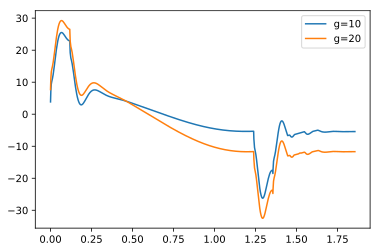

In [10]:
plt.plot(var1[0], var1[1], label='g=10')
plt.plot(var2[0], var2[1], label='g=20')
plt.legend()

## Misc

After simulation, you can extract a list of all variables via the `get_variables` method.

In [11]:
var_names = dymola.get_variables()
len(var_names)

5936

In [12]:
var_names[:10]

['Time',
 'mLoad',
 'rLoad[1]',
 'rLoad[2]',
 'rLoad[3]',
 'g',
 'refStartTime',
 'refSwingTime',
 'startAngle1',
 'startAngle2']

It also allows you to specify pattern of the variable by providing keyword. It can be handy to filter out the unwanted variables.

In [13]:
angle_variables = dymola.get_variables('Angle')

In [14]:
print(len(angle_variables))
angle_variables[:10]

48


['startAngle1',
 'startAngle2',
 'startAngle3',
 'startAngle4',
 'startAngle5',
 'startAngle6',
 'endAngle1',
 'endAngle2',
 'endAngle3',
 'endAngle4']

## Closing experiment

Since the Dymola is running in the background as a separate process, it is necessary to close the process explicitly:

In [15]:
dymola.close()

Closing dymola instance... [Done]


In practice, our code may come into exception, leading to unwanted exit of the main program, and leaving the Dymola process still running in the background. A good practice is to put the `close` part inside a `try ... except ... finally` block, so as to make sure the Dymola process is always properly closed.